# TEKNİK ANALİZ

[*********************100%%**********************]  1 of 1 completed


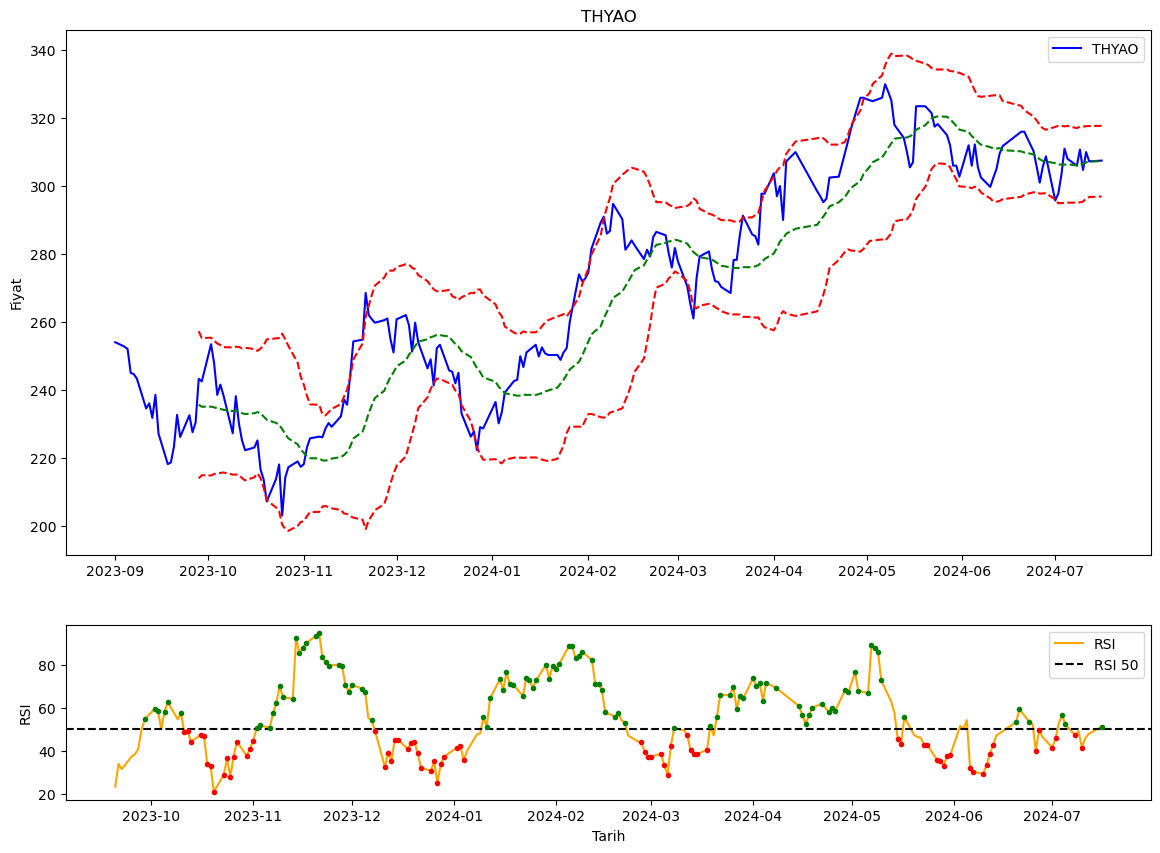

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = yf.download('THYAO.IS', start='2023-09-01', end='2024-07-17')

# Bollinger Bands'ı hesapla
window = 20
data['SMA'] = data['Close'].rolling(window=window).mean()
data['STD'] = data['Close'].rolling(window=window).std()
data['UpperBand'] = data['SMA'] + 2 * data['STD']
data['LowerBand'] = data['SMA'] - 2 * data['STD']

# RSI hesaplama
window_rsi = 14
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_rsi).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_rsi).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Hisse senedi fiyatını ve Bollinger Band
ax1.plot(data.index, data['Close'], label='THYAO', color='blue')
ax1.plot(data.index, data['UpperBand'], linestyle='--', color='red')
ax1.plot(data.index, data['SMA'], linestyle='--', color='green')
ax1.plot(data.index, data['LowerBand'],  linestyle='--', color='red')
ax1.set_title('THYAO')
ax1.set_ylabel('Fiyat')
ax1.legend()

# RSI grafiği ve RSI 50 çizgisi
ax2.plot(data.index, rsi, label='RSI', color='orange')
ax2.axhline(y=50, color='black', linestyle='--', label='RSI 50')
ax2.set_ylabel('RSI')
ax2.legend()

# RSI 50 ve Bollinger Bands orta bandı geçişleri
for i in range(len(data)):
    if rsi.iloc[i] > 50 and data['Close'].iloc[i] > data['SMA'].iloc[i]:
        ax2.plot(data.index[i], rsi.iloc[i], marker='o', markersize=3, color='green')
    elif rsi.iloc[i] < 50 and data['Close'].iloc[i] < data['SMA'].iloc[i]:
        ax2.plot(data.index[i], rsi.iloc[i], marker='o', markersize=3, color='red')

plt.xlabel('Tarih')
plt.grid(False)
plt.show()


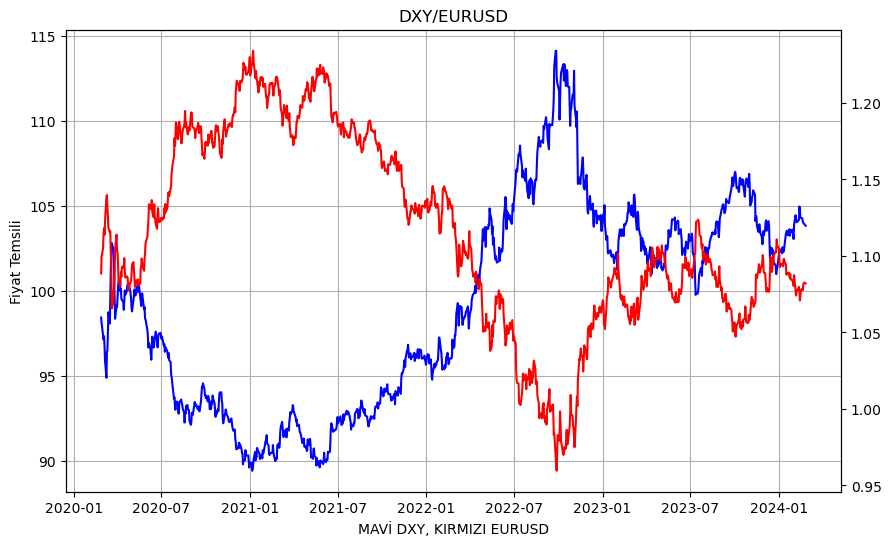

In [9]:
import matplotlib.pyplot as plt
start_det = "2020-02-27"
end_det = "2024-02-27"
selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
plt.figure(figsize = (10,6))
plt.plot(selected_det.index, selected_det["Close"], color = "blue")
plt.title("DXY/EURUSD")
plt.xlabel("MAVİ DXY, KIRMIZI EURUSD")
plt.ylabel("Fiyat Temsili")
plt.grid(True)


start_data = '2020-02-27'
end_data = '2024-02-27'
selected_data = data[(data.index >= start_data) & (data.index <= end_data)]
plt.twinx()
plt.plot(selected_data.index, selected_data['Close'], color='red')
plt.show()

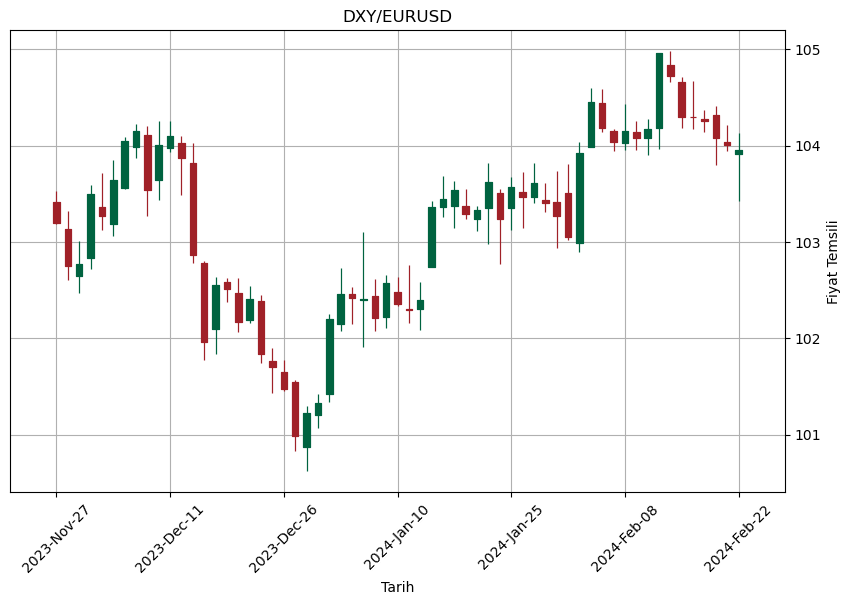

In [10]:
import mplfinance as mpf
import matplotlib.pyplot as plt

start_det = "2023-11-27"
end_det = "2024-02-22"
selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
fig, ax = plt.subplots(figsize=(10, 6))
mpf.plot(selected_det, type='candle', ax=ax, style='charles')
plt.title("DXY/EURUSD")
plt.xlabel("Tarih")
plt.ylabel("Fiyat Temsili")
plt.grid(True)
plt.show()

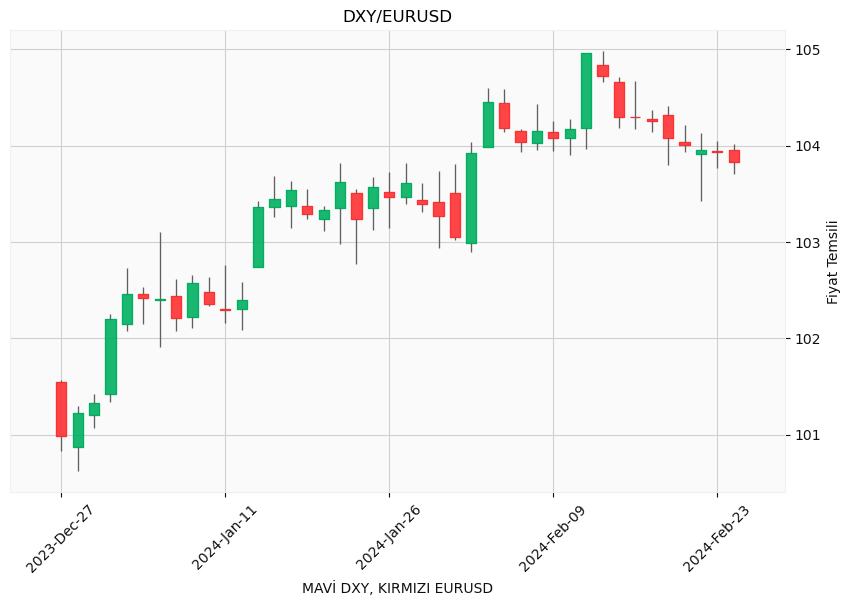

In [64]:
import mplfinance as mpf
import matplotlib.pyplot as plt
start_det = "2023-12-27"
end_det = "2024-02-27"

selected_det = det[(det.index >= start_det) & (det.index <= end_det)]
fig, ax = plt.subplots(figsize=(10, 6))

mpf.plot(selected_det, type='candle', ax=ax, style='yahoo')
plt.title("DXY/EURUSD")
plt.xlabel("MAVİ DXY, KIRMIZI EURUSD")
plt.ylabel("Fiyat Temsili")
plt.grid(True)



In [2]:
import pandas as pd
import yfinance as yf
veri = yf.download("THYAO.IS", start = "2022-02-27", end = "2024-02-27")
veri.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,279.75,284.00,278.75,281.25,281.25,38737028
2024-02-21,282.50,285.00,277.75,279.25,279.25,33090339
2024-02-22,281.00,287.25,280.75,285.00,285.00,45275866
2024-02-23,286.00,288.00,282.00,286.50,286.50,36388629
2024-02-26,288.00,290.50,284.75,285.50,285.50,46586805


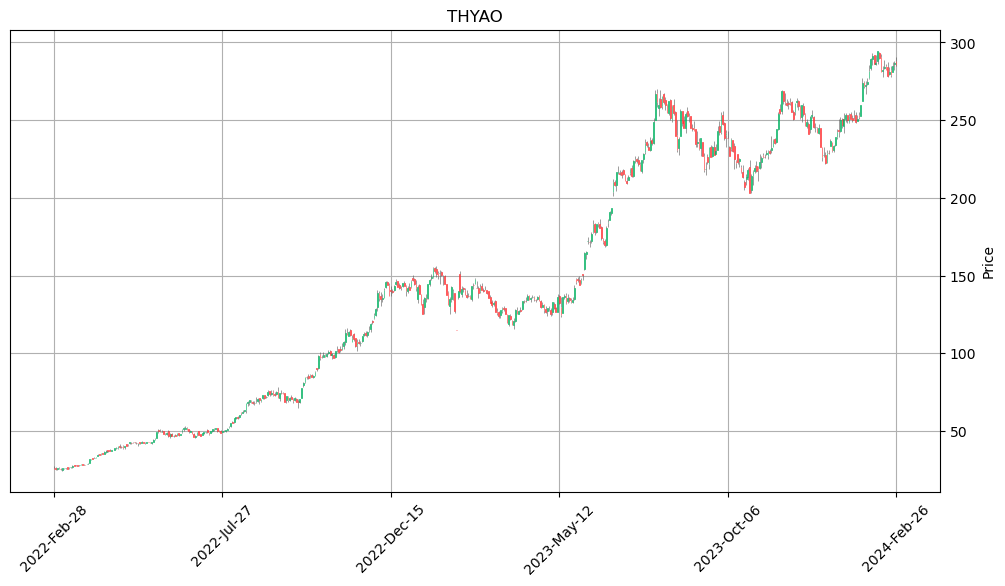

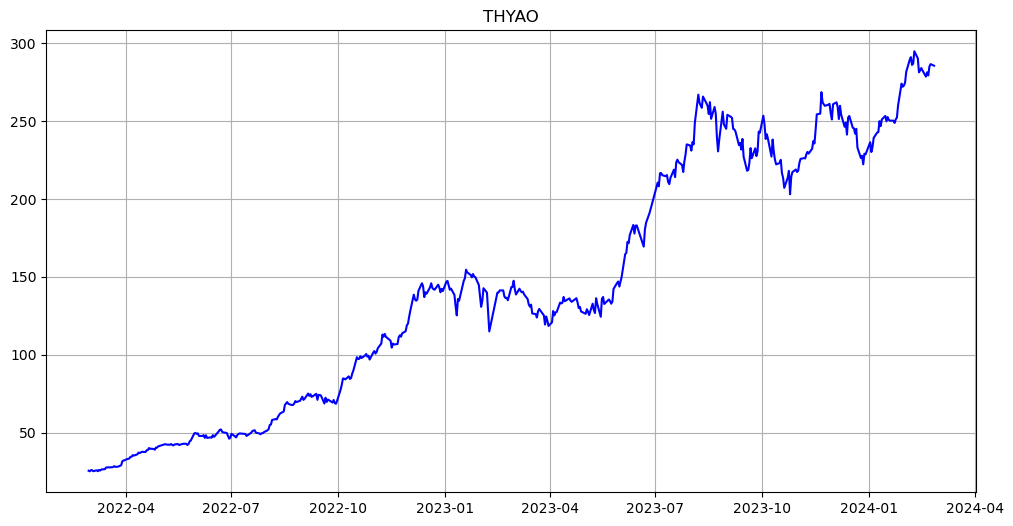

In [5]:
import mplfinance as mpf
import matplotlib.pyplot as plt
start = "2022-02-27"
end = "2024-02-27"
selected = veri[(veri.index >= start) & (veri.index <= end)]
fig,ax = plt.subplots(figsize = (12,6))
mpf.plot(selected, type = "candle", ax=ax, style = "yahoo")
plt.title("THYAO")
plt.grid(True)



start = "2022-02-27"
end = "2024-02-27"
selected = veri[(veri.index >= start) & (veri.index <= end)]
fig,ax = plt.subplots(figsize = (12,6))
plt.plot(selected.index, selected["Close"], color = "Blue")
plt.title("THYAO")
plt.grid(True)




[*********************100%%**********************]  1 of 1 completed


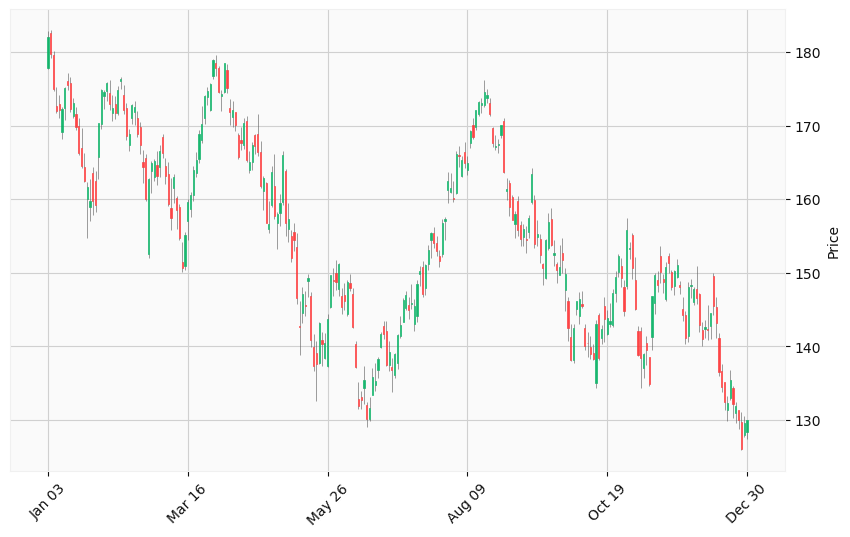

In [125]:
ticker = 'AAPL'
start_apple = '2022-01-01'
end_apple = '2022-12-31'
apple = yf.download(ticker, start=start_apple, end=end_apple)

fig,ax = plt.subplots(figsize = (10,6))
mpf.plot(apple, type='candle', ax=ax,style='yahoo')

[*********************100%%**********************]  1 of 1 completed


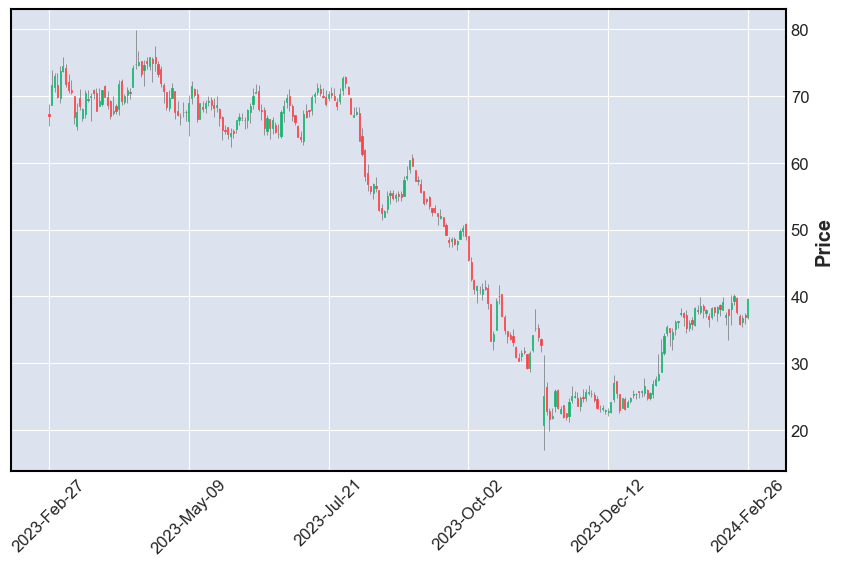

In [205]:
import pandas as pd
import yfinance as yf
ticker = 'ESTA'
start_esta = '2023-02-27'
end_esta = '2024-02-27'
esta = yf.download(ticker, start=start_esta, end=end_esta)
fig,ax = plt.subplots(figsize = (10,6))
mpf.plot(esta, type='candle', ax=ax,style='yahoo')


In [161]:
esta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-27 to 2024-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [187]:
sma_30 = pd.DataFrame()
sma_30["Adj_Close_Price"] = esta["Adj Close"].rolling(window = 30).mean()
sma_30
sma_100 = pd.DataFrame()
sma_100["Adj_Close_Price"] = esta["Adj Close"].rolling(window = 100).mean()
sma_100

,Adj_Close_Price
Date,
2023-02-27,NaN
2023-02-28,NaN
2023-03-01,NaN
2023-03-02,NaN
2023-03-03,NaN
...,...
2024-02-20,31.8840
2024-02-21,31.7445
2024-02-22,31.6089


In [193]:
esta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-27 to 2024-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [203]:
esta["Close"] = range(1,252)

In [206]:
esta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-27,67.400002,68.800003,65.500000,67.040001,67.040001,218200
2023-02-28,68.639999,73.989998,68.639999,71.660004,71.660004,298300
2023-03-01,71.449997,73.470001,70.559998,72.949997,72.949997,170900
2023-03-02,71.669998,73.419998,69.699997,69.900002,69.900002,251400
2023-03-03,69.800003,74.500000,69.000000,73.709999,73.709999,170500


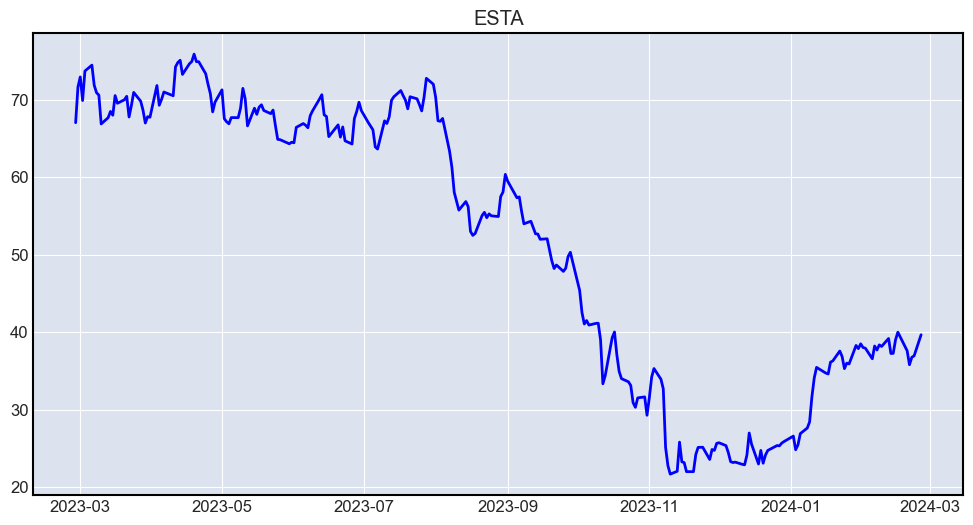

In [207]:
start = "2022-02-27"
end = "2024-02-27"
selected = veri[(veri.index >= start) & (veri.index <= end)]
fig,ax = plt.subplots(figsize = (12,6))
plt.plot(esta.index, esta["Close"], color = "Blue", )
plt.title("ESTA")
plt.grid(True)

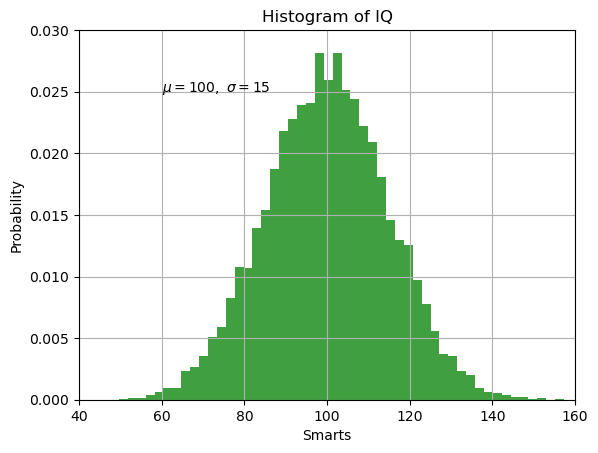

In [13]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
data = yf.download("THYAO.IS", start= "2023-02-27", end="2024-03-19")
dat = yf.download("DOAS.IS", start = "2023-02-27", end = "2024-03-19")
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-27,135.000000,143.399994,133.500000,143.399994,143.399994,52423380
2023-02-28,143.699997,145.500000,141.399994,143.600006,143.600006,45375506
2023-03-01,144.500000,148.699997,144.399994,147.500000,147.500000,39612979
2023-03-02,142.000000,146.199997,141.800003,142.000000,142.000000,36371596
2023-03-03,142.000000,143.199997,135.500000,138.699997,138.699997,39690451


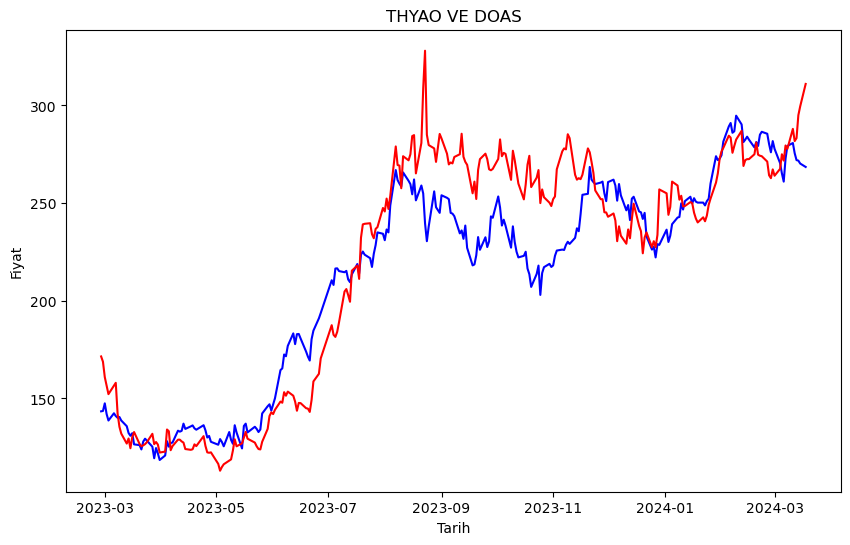

In [9]:
plt.figure(figsize=(10,6))

plt.plot(data.Close,color="blue")
plt.plot(dat.Close, color = "red")
plt.title("THYAO VE DOAS")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

plt.show()

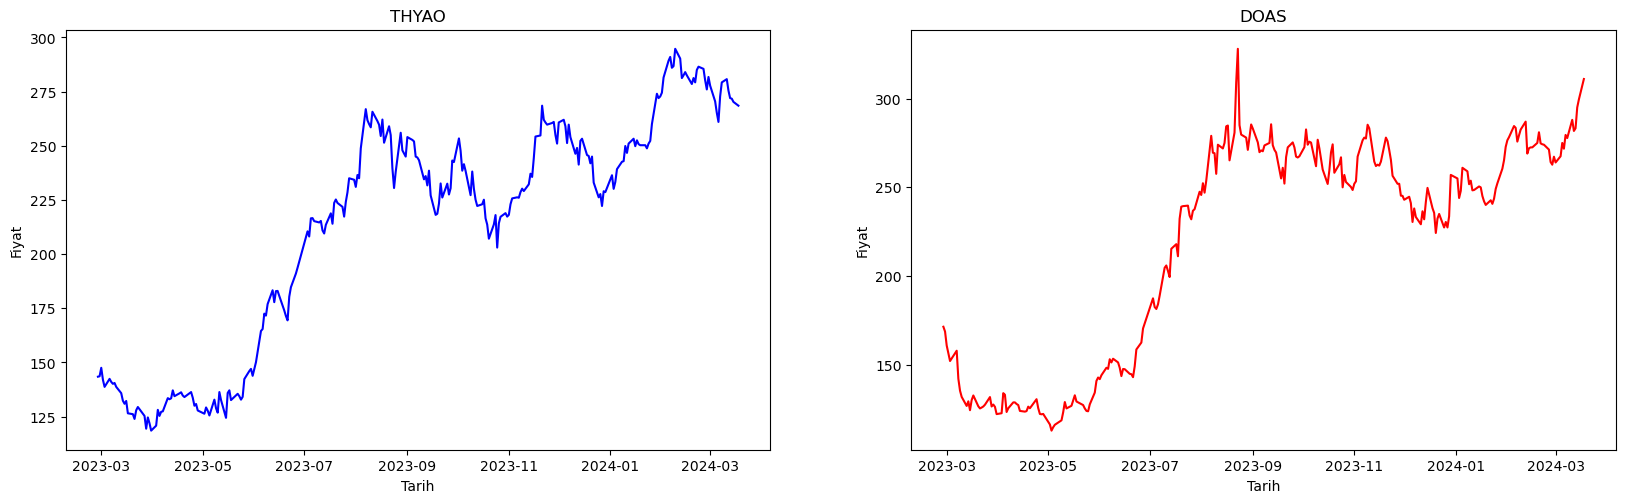

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(data.Close,color="blue")
plt.title("THYAO")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

plt.subplot(2,2,2)
plt.plot(dat.Close,color="red")
plt.title("DOAS")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-12,280.50,281.25,272.25,275.50,275.50,32599696
2024-03-13,275.75,277.50,272.00,272.00,272.00,29581973
2024-03-14,272.75,274.75,271.00,271.75,271.75,23368821
2024-03-15,272.25,275.75,268.00,270.25,270.25,30487511
2024-03-18,270.50,272.00,267.75,268.50,268.50,18926028


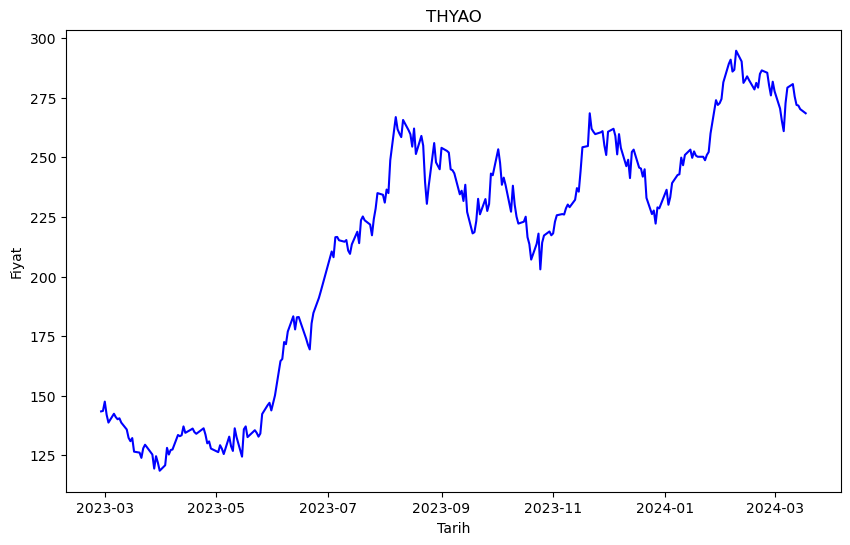

In [12]:
import pandas as pd

plt.figure(figsize=(10,6))
plt.plot(data.Close,color="blue")

plt.title("THYAO")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

plt.show()

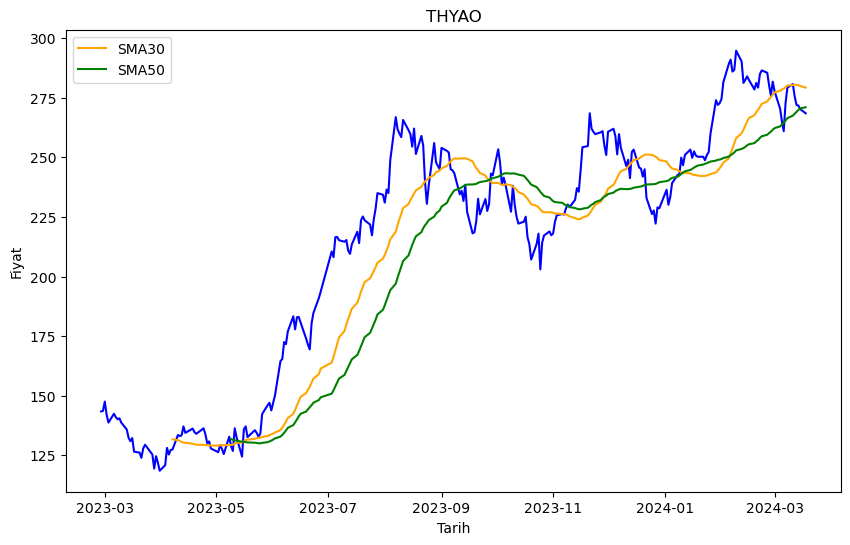

In [13]:
import pandas as pd
data['sma30'] = data['Close'].rolling(window=30).mean()
data['sma50'] = data['Close'].rolling(window=50).mean()
plt.figure(figsize=(10,6))
plt.plot(data.Close,color="blue")
plt.plot(data['sma30'], color="orange", label="SMA30")
plt.plot(data['sma50'], color="green", label="SMA50")
plt.title("THYAO")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.show()

In [16]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
sma30        29
sma50        49
dtype: int64

In [26]:
data[data["sma30"].isnull()].head()

,Open,High,Low,Close,Adj Close,Volume,sma30,sma50
Date,,,,,,,,
2023-02-27,135.000000,143.399994,133.500000,143.399994,143.399994,52423380,NaN,NaN
2023-02-28,143.699997,145.500000,141.399994,143.600006,143.600006,45375506,NaN,NaN
2023-03-01,144.500000,148.699997,144.399994,147.500000,147.500000,39612979,NaN,NaN
2023-03-02,142.000000,146.199997,141.800003,142.000000,142.000000,36371596,NaN,NaN
2023-03-03,142.000000,143.199997,135.500000,138.699997,138.699997,39690451,NaN,NaN


   Hisse  Miktar      Yüzde
0  thyao   41200  17.703526
1  tuprs   54619  23.469633
2  ttrak   94582  40.641624
3   doas   42321  18.185217


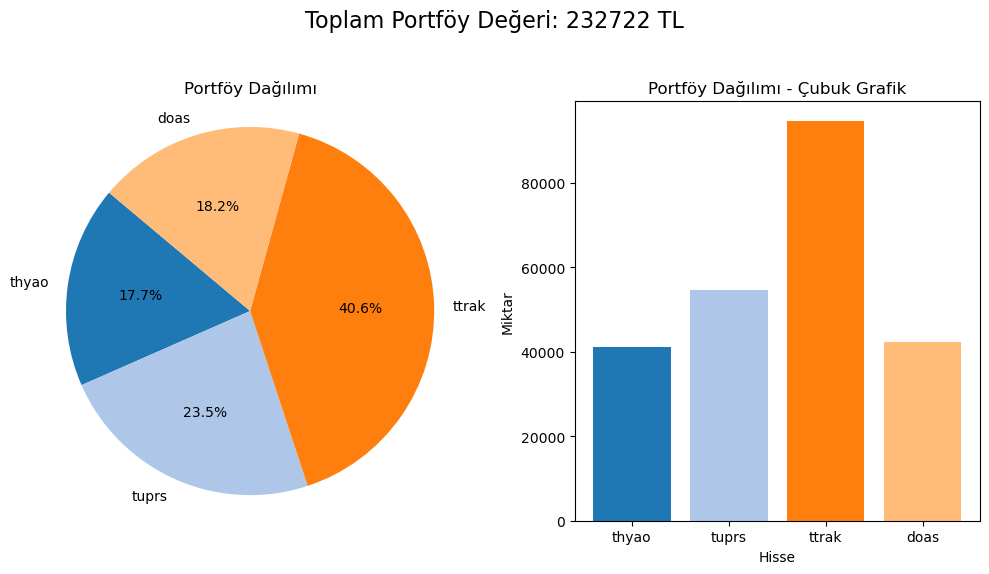

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Portföy verileri
portfoy = {
    'thyao': 41200,
    'tuprs': 54619,
    'ttrak': 94582,
    'doas': 42321
}

df = pd.DataFrame(list(portfoy.items()), columns=['Hisse', 'Miktar'])

toplam_deger = df['Miktar'].sum()

df['Yüzde'] = (df['Miktar'] / toplam_deger) * 100

print(df)

plt.figure(figsize=(10, 6))

colors = plt.get_cmap('tab20').colors

plt.subplot(1, 2, 1)
plt.pie(df['Miktar'], labels=df['Hisse'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Portföy Dağılımı')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.bar(df['Hisse'], df['Miktar'], color=colors)
plt.title('Portföy Dağılımı - Çubuk Grafik')
plt.xlabel('Hisse')
plt.ylabel('Miktar')

plt.suptitle(f'Toplam Portföy Değeri: {toplam_deger} TL', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()